## Método de Newton-Raphson
### Descripción
El método de Newton-Raphson es un método iterativo para encontrar raíces de una función real. Dada una función $f(x)$ y su derivada $f'(x)$, el método de Newton-Raphson genera una secuencia de aproximaciones $x_0, x_1, x_2, \ldots$ que convergen a una raíz de la función. La fórmula de recurrencia es:
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

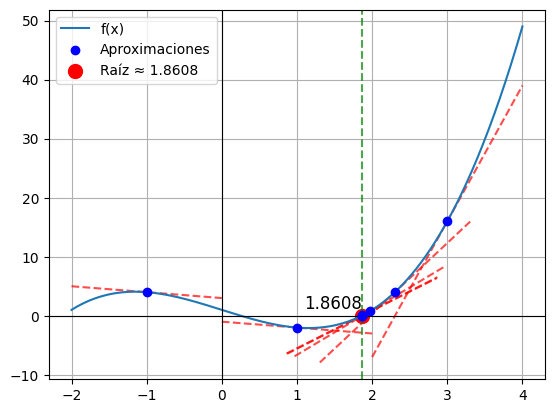

Raíz aproximada: 1.8608058567843473
La raíz de la función x**3 - 4*x + 1 es: 1.8608058567843473


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def newton_raphson(funcion_str, dfuncion_str, x0, tol=1e-6, max_iter=10):
    """
    Método de Newton-Raphson para encontrar raíces de una función.
    Muestra gráficamente la aproximación de la solución con rectas tangentes.
    
    Parámetros:
    funcion_str  -- función en forma de string
    dfuncion_str -- derivada de la función en forma de string
    x0 -- estimación inicial
    tol -- tolerancia para la convergencia
    max_iter -- número máximo de iteraciones
    """
    x = sp.symbols('x')
    f_expr = sp.sympify(funcion_str)
    df_expr = sp.sympify(dfuncion_str)
    
    f = sp.lambdify(x, f_expr, 'numpy')
    df = sp.lambdify(x, df_expr, 'numpy')
    
    x_vals = [x0]
    y_vals = [f(x0)]
    
    for i in range(max_iter):
        y = f(x0)
        dy = df(x0)
        if abs(y) < tol:
            break
        
        x1 = x0 - y / dy  
        x_vals.append(x1)
        y_vals.append(f(x1))
        
        x_range = np.linspace(x0 - 1, x0 + 1, 100)
        tangent = y + dy * (x_range - x0)
        
        plt.plot(x_range, tangent, 'r--', alpha=0.7) 
        x0 = x1 
    
    x_range = np.linspace(min(x_vals) - 1, max(x_vals) + 1, 400)
    plt.plot(x_range, f(x_range), label='f(x)')
    plt.scatter(x_vals, y_vals, color='blue', zorder=3, label='Aproximaciones')

    root = x_vals[-1]
    plt.axvline(root, color='green', linestyle='--', alpha=0.7)
    plt.scatter(root, 0, color='red', s=100, label=f"Raíz ≈ {root:.4f}")
    plt.text(root, 0.5, f"{root:.4f}", fontsize=12, verticalalignment='bottom', horizontalalignment='right')

    plt.axhline(0, color='black', linewidth=0.8)
    plt.axvline(0, color='black', linewidth=0.8)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Raíz aproximada: {root}")
    return root

# Uso
funcion = input("Ingrese la función en términos de x: ")
dfuncion = input("Ingrese la derivada de la función en términos de x: ")
x0 = float(input("Ingrese el valor inicial x0: "))
tolerancia = float(input("Ingrese la tolerancia: "))
max_iter = int(input("Ingrese el número máximo de iteraciones: "))

raiz = newton_raphson(funcion, dfuncion, x0, tolerancia, max_iter)
print(f"La raíz de la función {funcion} es: {raiz}")
